<a href="https://colab.research.google.com/github/NosenkoArtem/MADMO-advanced-/blob/master/%22%5Bhw%5DGradientBoostingTask1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Boosting: gradient boosting


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

![Замещающий текст](https://)In this task you are asked to implement a boosting algorithm, and compare speed of
different popular boosting libraries.

Let's generate a toy dataset for classification.

In [ ]:
X, y = make_moons(n_samples=1000, shuffle=True, noise=0.25, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)
y_train[y_train==0] = -1
y_test[y_test==0] = -1

# X, y = make_circles(n_samples=1000, factor=0.5, random_state=0, noise=0.15)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)
# y_train[y_train==0] = -1
# y_test[y_test==0] = -1

# centers = [[1, 1], [-1, -1]]

# X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.8, random_state=1011)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)
# y_train[y_train==0] = -1
# y_test[y_test==0] = -1

Your task:
1. Implement adaboost (or gradient boosting) algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;


2. **Plot the decision boundary** on a $2$-d grid; 



3. Estimate the accuracy **score** on the test dataset, as well as other classification metrics

In [ ]:
class DecisionStump():
    def __init__(self):
        # как классифицируем объект при увеличении признака
        self.polarity = 1
        # индекс признака по которому происходит разбиение
        self.feature_index = None
        # порог
        self.threshold = None
        # величина весового коэффициента при решающем правиле
        self.alpha = None


class AdaBoost():
    def __init__(self, max_iter):
        self.weights = []
        self.models = []
        self.max_iter = max_iter
    
    def fit(self, X, y, regressor=None):
        n_samples, n_features = np.shape(X)
        # инициализируем веса
        sample_weights = np.full(n_samples, (1 / n_samples))

        for iter in range(self.max_iter):
            clf = DecisionStump()
            min_error = 1000
        # проходимся по признакам и пороговым значениям для классификации    
            for feature_i in range(n_features):
                unique_values = np.unique(X[:, feature_i])
                for threshold in unique_values:
                    k = 0
                    while k<2:
                        # если выше порога классифицируем как +1
                        if k == 0: 
                            p = 1
                            prediction = np.ones(np.shape(y))
                            prediction[X[:, feature_i] < threshold] = -1
                        # если выше порога классифицируем как -1
                        elif k == 1:
                            p = -1
                            prediction = np.ones(np.shape(y))
                            prediction[X[:, feature_i] > threshold] = -1
                        # считаем ошибку на объектах
                        error = np.sum(sample_weights[y!=prediction])
                        if error < min_error:
                            clf.polarity = p
                            clf.threshold = threshold
                            clf.feature_index = feature_i
                            min_error = error
                            predictions = prediction
                        k+=1
            # считаем коэффициент при решающем правиле            
            clf.alpha = 0.5 * np.log((1.0 - min_error) / (min_error + 1e-10))
            self.weights.append(clf.alpha)
            # перевзвешиваем все объекты
            sample_weights *= np.exp(-clf.alpha * y * predictions)
            # нормируем значения весов
            sample_weights /= np.sum(sample_weights)
            
            self.models.append(clf)
        
    def predict(self, X):
        n_samples = np.shape(X)[0]
        y_pred = np.zeros((n_samples, 1))

        for clf in self.models:

            predictions = np.ones(np.shape(y_pred))
            
            negative_idx = (clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold)
            predictions[negative_idx] = -1
            y_pred += clf.alpha * predictions

        y_pred = np.sign(y_pred).flatten()
        return y_pred

In [ ]:
%%time
custom_clf = AdaBoost(max_iter=30)
custom_clf.fit(X_train, y_train)
y_pred_train = custom_clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print ("Accuracy on train: {:.2f}".format(accuracy_train))

y_pred_test = custom_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print ("Accuracy on test: {:.2f}".format(accuracy_test))

Accuracy on train: 0.96
Accuracy on test: 0.94
CPU times: user 1.48 s, sys: 2.98 ms, total: 1.48 s
Wall time: 1.49 s


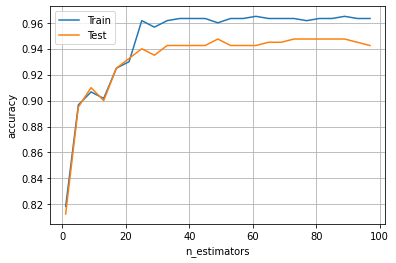

In [ ]:
# посмотрим как меняется качество при увеличении количества "weak learners"
accuracy_train, accuracy_test = [], []
iters = np.arange(1, 100, 4)
for iter in iters:
    clf = AdaBoost(max_iter=iter)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_train.append(accuracy)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_test.append(accuracy)
plt.plot(iters, accuracy_train, label='Train')
plt.plot(iters, accuracy_test, label='Test')
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.grid()
plt.legend();  

Please refer to mlxtend by yourself. It's a nice library to plot the images

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


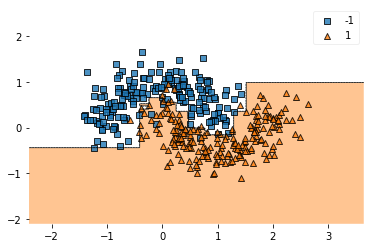

In [ ]:
from mlxtend.plotting import plot_decision_regions
# 0 means 1 due to issue in mlextend
plot_decision_regions(X_test, y_test, clf=clf)
plt.show()

In [ ]:
%%time
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=30, learning_rate=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print ("Accuracy on train:", accuracy)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy on test:", accuracy)

Accuracy on train: 0.97
Accuracy on test: 0.9425
CPU times: user 61.2 ms, sys: 1 ms, total: 62.2 ms
Wall time: 62.8 ms


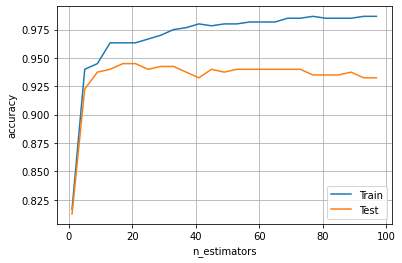

In [ ]:
# посмотрим как меняется качество при увеличении количества "weak learners"
accuracy_train, accuracy_test = [], []
iters = np.arange(1, 100, 4)
for iter in iters:
    clf = AdaBoostClassifier(n_estimators=iter, learning_rate=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_train.append(accuracy)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_test.append(accuracy)
plt.plot(iters, accuracy_train, label='Train')
plt.plot(iters, accuracy_test, label='Test')
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.grid()
plt.legend();  

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


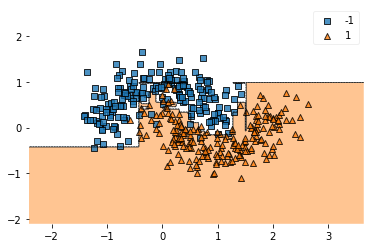

In [ ]:
from mlxtend.plotting import plot_decision_regions
# 0 means 1 due to issue in mlextend
plot_decision_regions(X_test, y_test, clf=clf)
plt.show()